The following code provides predictive analysis of the training dataset using machine learning method.
- This is a 1st trial using engineered data from previous statistical analysis.
- 'Interest_level' is mapped into 0 and 1, thus the problem is transformed into a binary classification problem.
- log loss is the evaluation metric.
- Only training dataset is used.
- Best results using five-fold cross validation are ScaledLR: 0.523999 GBM: 0.482808 (possible data leaking?), XGBoost:0.463509 (possible data leaking?). Decision tree based method such as CART and random forests perform really bad here.
- Further feature engineering are needed to optimize the prediction results.

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import log_loss
%matplotlib inline

### Step 1. Import data
This training data is exported data from previous statistical analysis.

In [24]:
train = pd.read_csv('cleaned_train.csv', header = 0)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48970 entries, 0 to 48969
Data columns (total 41 columns):
Unnamed: 0           48970 non-null int64
bathrooms            48970 non-null float64
bedrooms             48970 non-null int64
interest_level       48970 non-null int64
latitude             48970 non-null float64
longitude            48970 non-null float64
price                48970 non-null int64
loglat_0             48970 non-null int64
loglat_1             48970 non-null int64
loglat_2             48970 non-null int64
loglat_3             48970 non-null int64
loglat_4             48970 non-null int64
loglat_5             48970 non-null int64
loglat_6             48970 non-null int64
loglat_7             48970 non-null int64
loglat_8             48970 non-null int64
loglat_9             48970 non-null int64
num_features         48970 non-null int64
laundry              48970 non-null int64
elevator             48970 non-null int64
hardwood             48970 non-null int64
cat

In [26]:
y = train['interest_level']
train = train.drop(['Unnamed: 0', 'interest_level', 'date_created'], axis = 1)
x = train.values

### Step 3. Building ML Algorithms
Let's try logistic regression, knn, decision trees, supported vector machine, naive bayes first. This is the pipeline I use for most machine learning problems.

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127

ScaledLR: 0.523999 (0.006872)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127

ScaledKNN: 1.880838 (0.047959)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127

ScaledCART: 10.037736 (0.151606)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


ScaledNB: 12.193838 (2.553912)


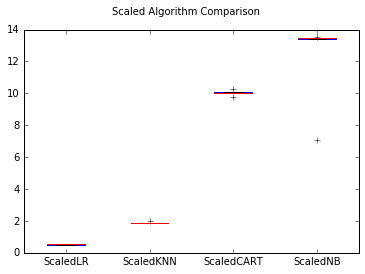

In [28]:
validation_size = 0.30
seed = 2018
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size = validation_size, random_state = seed)

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))

from sklearn.metrics import log_loss
results = []
names = []
scoring = 'log_loss'
num_folds = 5
seed = 2018

for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'log_loss')
    results.append(- cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, - cv_results.mean(), cv_results.std())
    print(msg)    

# compare algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot( results)
ax.set_xticklabels(names)
plt.show()

Ensemble methods

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127

AB: 0.682230 (0.000570)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127

GBM: 0.482808 (0.003285)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


RF: 1.054751 (0.033050)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


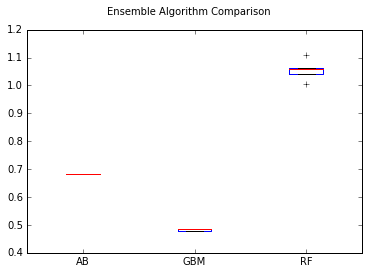

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
    results.append(- cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, -cv_results.mean(), cv_results.std())
    print(msg)

# compare algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

XGBoost

In [31]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.cross_validation import StratifiedKFold

model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate = learning_rate)
kfold = StratifiedKFold(Y_train, n_folds = 5, shuffle = True, random_state = 2018)
grid_search = GridSearchCV(model, param_grid, scoring = 'neg_log_loss', n_jobs = 1, cv = kfold)
result = grid_search.fit(X_train, Y_train)

# summarize results
print("BestL %f using %s" % (- result.best_score_, result.best_params_))
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
    stdev = scores.std()
    means.append(- mean_score)
    stdevs.append(stdev)
    print("%f (%f) with: %r" %(- mean_score, stdev, params))    


BestL 0.463509 using {'learning_rate': 0.3}
0.690774 (0.000036) with: {'learning_rate': 0.0001}
0.671380 (0.000350) with: {'learning_rate': 0.001}
0.576280 (0.001993) with: {'learning_rate': 0.01}
0.484668 (0.003219) with: {'learning_rate': 0.1}
0.469789 (0.001965) with: {'learning_rate': 0.2}
0.463509 (0.002204) with: {'learning_rate': 0.3}


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
